In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

In [3]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


# **Checking the count of each label**

In [12]:
labels = data['label'].unique()
for label in sorted(labels):
    print(str(label)+" : "+str(len(data[data['label']==label])))

0 : 327
1 : 514
2 : 1099
3 : 115
4 : 6705
5 : 142
6 : 1113


# **Random Over-Sampling**

In [13]:
X, y = data.drop('label', axis=1), data['label']
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
X, y = over.fit_resample(X, y)

In [14]:
X['label']=y
data = X

/tmp/ipykernel_34/1939126201.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['label']=y


In [15]:
columns = data.columns[:-1]
len(columns)

2352

# **Generating Image 0**

In [16]:
import matplotlib.pyplot as plt

In [17]:
i0 = np.array(data.loc[0].values[:-1]).reshape(28,28,3)

In [18]:
data.loc[0]['label']

2

In [19]:
i0

array([[[192, 153, 193],
        [195, 155, 192],
        [197, 154, 185],
        ...,
        [193, 144, 153],
        [197, 154, 163],
        [194, 152, 160]],

       [[197, 162, 202],
        [201, 160, 197],
        [202, 160, 193],
        ...,
        [194, 147, 149],
        [198, 158, 166],
        [192, 153, 167]],

       [[197, 155, 193],
        [198, 154, 185],
        [202, 156, 191],
        ...,
        [194, 149, 152],
        [199, 161, 177],
        [194, 156, 175]],

       ...,

       [[194, 157, 191],
        [206, 173, 206],
        [206, 165, 192],
        ...,
        [191, 155, 183],
        [193, 159, 187],
        [193, 163, 197]],

       [[187, 154, 185],
        [203, 171, 199],
        [202, 161, 183],
        ...,
        [178, 131, 148],
        [187, 152, 174],
        [190, 159, 189]],

       [[171, 136, 164],
        [191, 153, 179],
        [196, 155, 176],
        ...,
        [173, 124, 138],
        [183, 147, 166],
        [185, 154, 177]]

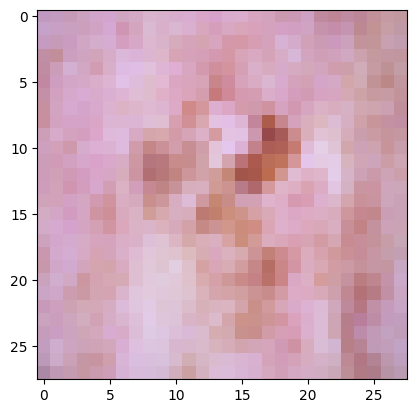

In [20]:
plt.imshow(i0)

# **Preparing the dataset**

In [21]:
images=[]
labels=[]
for ind in range(len(data)):
    image = np.array(data.loc[ind].values[:-1]).reshape(28,28,3)
    images.append(image)
    labels.append(data.loc[ind]['label'])

In [22]:
X = np.array(images)
y = np.array(labels)

# **One Hot Encoding**

In [23]:
y = pd.get_dummies(y).astype(int)

In [143]:
y

,0,1,2,3,4,5,6
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
10010,1,0,0,0,0,0,0
10011,1,0,0,0,0,0,0
10012,1,0,0,0,0,0,0
10013,1,0,0,0,0,0,0


# **Data Splitting**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=42)

In [26]:
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True, random_state=42)

In [27]:
len(X_train), len(X_test), len(X_valid), len(X)

(32854, 7040, 7041, 46935)

# **Model Selection, Training and Evaluation**

In [28]:
import tensorflow as tf

2024-03-10 06:42:36.282350: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 06:42:36.282499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 06:42:36.461404: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [29]:
shape = X[0].shape
shape

(28, 28, 3)

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [32]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics=['CategoricalAccuracy']
)

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

In [34]:
history = model.fit(
      X_train,
      y_train,
      validation_data=(X_valid, y_valid),
      epochs=200,
      verbose=1,
      batch_size=64,
      callbacks = [early_stopping]
)

Epoch 1/200
514/514 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - CategoricalAccuracy: 0.1693 - loss: 2.1016 - val_CategoricalAccuracy: 0.2477 - val_loss: 1.9259
Epoch 2/200
514/514 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - CategoricalAccuracy: 0.2528 - loss: 1.9012 - val_CategoricalAccuracy: 0.3509 - val_loss: 1.7544
Epoch 3/200
514/514 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - CategoricalAccuracy: 0.3414 - loss: 1.7239 - val_CategoricalAccuracy: 0.4681 - val_loss: 1.5216
Epoch 4/200
514/514 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - CategoricalAccuracy: 0.4168 - loss: 1.5503 - val_CategoricalAccuracy: 0.4991 - val_loss: 1.4251
Epoch 5/200
514/514 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - CategoricalAccuracy: 0.4411 - loss: 1.4849 - val_CategoricalAccuracy: 0.5092 - val_loss: 1.3776
Epoch 6/200
514/514 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - CategoricalAccuracy: 0.4610 - loss: 1.4307 - val_CategoricalAccuracy: 0.5265 - val_loss: 1.3267
Epoch 7/200
514/514 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - CategoricalAccuracy: 0.47

In [35]:
model.evaluate(X_test, y_test)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - CategoricalAccuracy: 0.9140 - loss: 0.2847


[0.2877902686595917, 0.9115056991577148]

# **Training Accuracy = 87.37% and Test Accuracy = 91.4%**

# **Generating the Classification Report**

In [36]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    l = list(y_pred[i])
    ind = l.index(max(l))
    l = [0]*7
    l[ind] = 1
    y_pred[i]=np.array(l)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1046
           1       0.94      0.98      0.96       983
           2       0.83      0.86      0.84       977
           3       0.99      1.00      0.99      1005
           4       0.92      0.64      0.76      1049
           5       0.98      1.00      0.99       954
           6       0.77      0.91      0.83      1026

   micro avg       0.91      0.91      0.91      7040
   macro avg       0.92      0.91      0.91      7040
weighted avg       0.92      0.91      0.91      7040
 samples avg       0.91      0.91      0.91      7040



# **Loss of the Model**

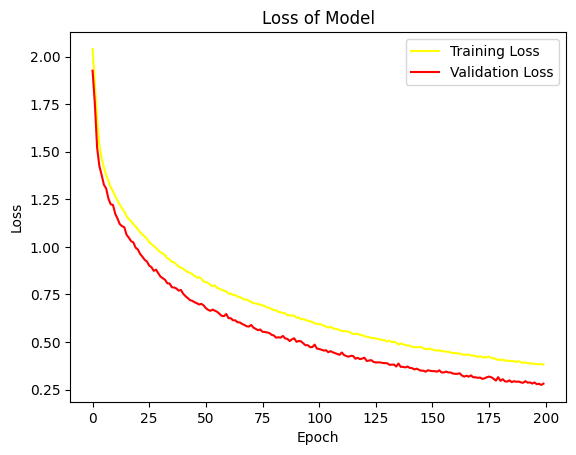

In [38]:
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# **Testing on a Random Image in the Dataset**

In [39]:
model.predict(np.expand_dims(np.array(X[300]), axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[2.48910789e-03, 2.56294638e-01, 7.14292765e-01, 1.07188971e-04,
        2.48543359e-02, 1.35983695e-08, 1.96189550e-03]], dtype=float32)

**The highest probability is for Category 2**

In [125]:
y.loc[300]

0    0
1    0
2    1
3    0
4    0
5    0
6    0
Name: 300, dtype: int64

**The class label is 2**